# Chessboard Vision Project  

## 📌 Introduction  
This project is part of the **Computer Vision** course in the Master's in Artificial Intelligence. The goal is to detect chess pieces on a board from images, determine their positions using bounding boxes, and represent them in an 8x8 matrix format. The solution is implemented in Python and follows a structured image processing pipeline.

## 🎯 Task Overview  
- **Input:** Chessboard image  
- **Output:**  
  - Total number of black/white pieces  
  - Bounding boxes around detected pieces  
  - 8x8 matrix representing piece positions  
- **Dataset:** 50 images for development, 10 unseen test images  
- **Deliverables:**  
  - Python script (single file)  
  - Short report (max 2 pages) 

---

In [3]:
# Importing Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import cv2
import math

# Data Directory
dataDir = 'images'

# Define the window size
window_width = 800
window_height = 600

In [1]:
# Function to resize image
def resize_image(image, window_width, window_height):
    height, width = image.shape[:2]
    scaling_factor = min(window_width / width, window_height / height)
    return cv2.resize(image, None, fx=scaling_factor, fy=scaling_factor, interpolation=cv2.INTER_AREA)

Image Dimensions: 3072 x 3072
Number of Channels: 3


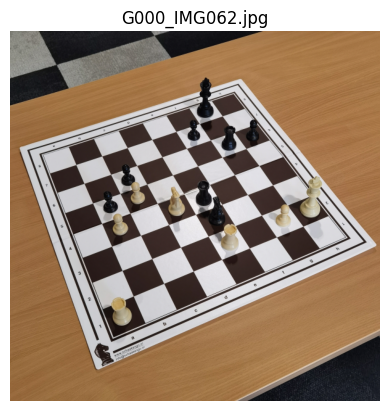

In [4]:
# Read and Display an Image
# Opening an image
img = cv2.imread(os.path.join(dataDir, 'G000_IMG062.jpg'))

# Get the dimensions of the image
height, width, channels = img.shape
print(f'Image Dimensions: {height} x {width}')
print(f'Number of Channels: {channels}')

# Calculate the scaling factor
scaling_factor = min(window_width / width, window_height / height)

# Resize the image
resized_img = resize_image(img, window_width, window_height)

# Display the resized image using matplotlib
plt.imshow(cv2.cvtColor(resized_img, cv2.COLOR_BGR2RGB))
plt.title('G000_IMG062.jpg')
plt.axis('off')
plt.show()

## Step 1: Chessboard Detection

In [57]:
def detect_chessboard(image_path):
    # Carregar a imagem
    image = cv2.imread(image_path)
    if image is None:
        print(f"Erro: Não foi possível carregar a imagem em '{image_path}'.")
        return None

    # Converter para o espaço de cor HSV
    hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

    # Definir intervalos de cor para segmentação (ajustar conforme necessário)
    lower_bound = np.array([0, 0, 0])  # Limite inferior (preto ou escuro)
    upper_bound = np.array([180, 255, 120])  # Limite superior (tons escuros)

    # Criar uma máscara binária
    mask = cv2.inRange(hsv, lower_bound, upper_bound)

    # Limpar a máscara com operações morfológicas
    kernel = np.ones((5, 5), np.uint8)
    mask_cleaned = cv2.morphologyEx(mask, cv2.MORPH_CLOSE, kernel)

    # Encontrar contornos na máscara
    contours, _ = cv2.findContours(mask_cleaned, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    # Filtrar contornos por área (assumindo que o tabuleiro é o maior contorno)
    min_area = 1000  # Ajustar conforme o tamanho esperado do tabuleiro
    chessboard_contours = [cnt for cnt in contours if cv2.contourArea(cnt) > min_area]

    if not chessboard_contours:
        print("Nenhum tabuleiro detectado.")
        return None

    # Selecionar o maior contorno
    largest_contour = max(chessboard_contours, key=cv2.contourArea)

    # Desenhar o contorno detectado na imagem original
    result_image = image.copy()
    cv2.drawContours(result_image, [largest_contour], -1, (0, 255, 0), 3)

    # Exibir a imagem com o tabuleiro detectado
    plt.figure(figsize=(10, 10))
    plt.imshow(cv2.cvtColor(result_image, cv2.COLOR_BGR2RGB))
    plt.title('Tabuleiro Detectado')
    plt.axis('off')
    plt.show()

    return largest_contour

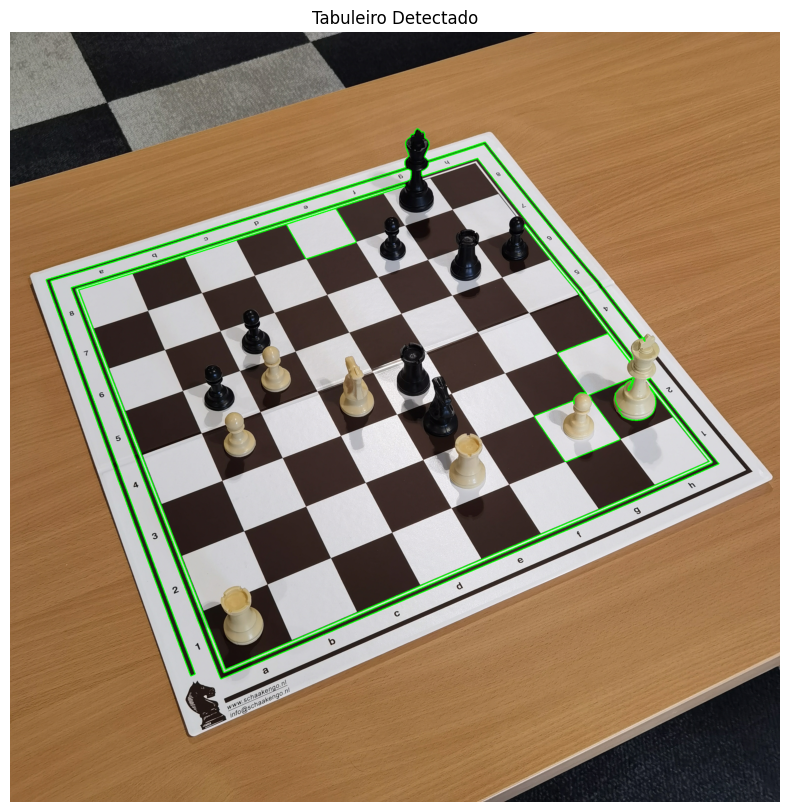

array([[[1623,  386]],

       [[1620,  389]],

       [[1620,  390]],

       ...,

       [[1632,  389]],

       [[1631,  389]],

       [[1628,  386]]], shape=(18487, 1, 2), dtype=int32)

In [58]:
image_path = os.path.join(dataDir, 'G000_IMG062.jpg')

detect_chessboard(image_path)